In the notebook `LSS_AGN-01_preparation` we prepared a simulated data cube of an AGN for "observation" with Scopesim/METIS. If you do not have the files `AGN_sim_prepared.fits` and `AGN_sim_rotated_50.fits`, please run the first notebook before proceeding.

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
%matplotlib inline

In [2]:
import scopesim as sim
sim.bug_report()

# Edit this path if you have a custom install directory, otherwise comment it out. [For ReadTheDocs only]
sim.link_irdb("../../../")

Python:
3.10.18 (main, Jun  5 2025, 13:08:10) [GCC 11.2.0]

Installed Python packages:
           anisocado: 0.3.0
         astar-utils: 0.3.3
             astropy: 6.1.7
      beautifulsoup4: 4.13.4
            docutils: 0.19
               httpx: 0.28.1
                lxml: 5.4.0
          matplotlib: 3.10.5
      more-itertools: 10.7.0
               numpy: 1.26.4
           packaging: 25.0
               pooch: 1.8.2
              pyyaml: 6.0.2
               scipy: 1.15.3
            scopesim: 0.10.0
       scopesim_data: could not be loaded.
  scopesim_templates: 0.6.2
         skycalc-ipy: 0.5.3
             synphot: 1.6.0
                tqdm: 4.67.1

Installed IRDB packages:
  Armazones: 2023-07-11
        ELT: 2025-06-30
      METIS: 2025-06-30

Operating System info:
   System: Linux
  Release: 6.12.13-200.fc41.aarch64
  Version: #1 SMP PREEMPT_DYNAMIC Sat Feb  8 20:30:50 UTC 2025
  Machine: aarch64


If you haven't got the instrument packages yet, uncomment the following cell.

In [3]:
# sim.download_packages(["METIS", "ELT", "Armazones"])

In [4]:
cmd = sim.UserCommands(use_instrument="METIS", set_modes=['lss_n'],
                      properties={"!OBS.exptime": 3600, "!OBS.dit": None, "!OBS.ndit": None,
                                  "!SIM.spectral.spectral_bin_width": 3.0e-3})
metis = sim.OpticalTrain(cmd)

py.warnings - WARNING: /root/miniconda3/envs/scopesim/lib/python3.10/site-packages/scopesim/effects/spectral_trace_list.py:163: DeprecationWarning: The fov_grid method is deprecated and will be removed in a future release.
  fov = thetrace.fov_grid()

py.warnings - WARNING: /root/miniconda3/envs/scopesim/lib/python3.10/site-packages/scopesim/effects/spectral_trace_list.py:205: DeprecationWarning: The fov_grid method is deprecated and will be removed in a future release.
  vol = spt.fov_grid()



Create two `Source` objects from the files. The first one is with the original field orientation, the second one has the field rotated by 50 degrees. We also define a `Source` that represents blank sky for background subtraction.

In [5]:
cube_01 = "AGN_sim_prepared.fits"
cube_02 = "AGN_sim_rotated_50.fits"

with fits.open(cube_01) as cube_hdul:
    src_01 = sim.Source(cube=cube_hdul)
with fits.open(cube_02) as cube_hdul:
    src_02 = sim.Source(cube=cube_hdul)

sky = sim.source.source_templates.empty_sky()

We observe each of the two sources and the blank sky; this takes a few minutes.

In [6]:
metis.observe(src_01, update=True)
hdul_01 = metis.readout(detector_readout_mode="auto")[0]

py.warnings - WARNING: /root/miniconda3/envs/scopesim/lib/python3.10/site-packages/scopesim/effects/spectral_trace_list.py:205: DeprecationWarning: The fov_grid method is deprecated and will be removed in a future release.
  vol = spt.fov_grid()

astar.scopesim.optics.image_plane_utils - WARNING: imagehdu.data.ndim is 3, but wcs.naxis with key   is 2, both should be equal.
astar.scopesim.optics.image_plane_utils - WARNING: Non-linear WCS rescaled using linear procedure.


 FOV effects:   0%|          | 0/2 [00:00<?, ?it/s]

astar.scopesim.effects.psfs - Interpolating PSF onto (1933, 17, 512) cube


 PSF slices:   0%|          | 0/1933 [00:00<?, ?it/s]

astar.scopesim.optics.image_plane - No BUNIT found in added HDU.
astar.scopesim.effects.electronic - Detector mode set to low_capacity
astar.scopesim.effects.electronic - Requested exposure time: 3600.000 s
astar.scopesim.effects.electronic - Required DIT without saturation: 0.039 s
astar.scopesim.effects.electronic - Exposure parameters: DIT = 0.039 s, NDIT = 92964
astar.scopesim.effects.electronic - Total exposure time: 3600.000 s
astar.scopesim.detector.detector_manager - Extracting from 1 detectors...
astar.scopesim.effects.electronic - Applying gain 14
astar.scopesim.effects.electronic - Applying digitization to dtype float32.
astar.scopesim.effects.electronic - Exposure parameters: DIT = 0.039 s, NDIT = 92964
astar.scopesim.effects.electronic - Total exposure time: 3600.000 s


In [7]:
metis.observe(src_02, update=True)
hdul_02 = metis.readout(detector_readout_mode="auto")[0]

py.warnings - WARNING: /root/miniconda3/envs/scopesim/lib/python3.10/site-packages/scopesim/effects/spectral_trace_list.py:205: DeprecationWarning: The fov_grid method is deprecated and will be removed in a future release.
  vol = spt.fov_grid()

astar.scopesim.optics.image_plane_utils - WARNING: imagehdu.data.ndim is 3, but wcs.naxis with key   is 2, both should be equal.
astar.scopesim.optics.image_plane_utils - WARNING: Non-linear WCS rescaled using linear procedure.


 FOV effects:   0%|          | 0/2 [00:00<?, ?it/s]

astar.scopesim.optics.image_plane - No BUNIT found in added HDU.
astar.scopesim.effects.electronic - Detector mode set to low_capacity
astar.scopesim.effects.electronic - Exposure parameters: DIT = 0.039 s, NDIT = 92964
astar.scopesim.effects.electronic - Total exposure time: 3600.000 s
astar.scopesim.detector.detector_manager - Extracting from 1 detectors...
astar.scopesim.effects.electronic - Applying gain 14
astar.scopesim.effects.electronic - Applying digitization to dtype float32.
astar.scopesim.effects.electronic - Exposure parameters: DIT = 0.039 s, NDIT = 92964
astar.scopesim.effects.electronic - Total exposure time: 3600.000 s


In [8]:
metis.observe(sky, update=True)
hdul_sky = metis.readout(detector_readout_mode="auto")[0]

py.warnings - WARNING: /root/miniconda3/envs/scopesim/lib/python3.10/site-packages/scopesim/effects/spectral_trace_list.py:205: DeprecationWarning: The fov_grid method is deprecated and will be removed in a future release.
  vol = spt.fov_grid()



 FOV effects:   0%|          | 0/2 [00:00<?, ?it/s]

astar.scopesim.optics.image_plane - No BUNIT found in added HDU.
astar.scopesim.effects.electronic - Detector mode set to low_capacity
astar.scopesim.effects.electronic - Exposure parameters: DIT = 0.039 s, NDIT = 92964
astar.scopesim.effects.electronic - Total exposure time: 3600.000 s
astar.scopesim.detector.detector_manager - Extracting from 1 detectors...
astar.scopesim.effects.electronic - Applying gain 14
astar.scopesim.effects.electronic - Applying digitization to dtype float32.
astar.scopesim.effects.electronic - Exposure parameters: DIT = 0.039 s, NDIT = 92964
astar.scopesim.effects.electronic - Total exposure time: 3600.000 s


The difference between the background-subtracted 2D-spectra of the two sources is significant. Compare to the images in the first notebook, `LSS_AGN-01_preparation.ipynb`.

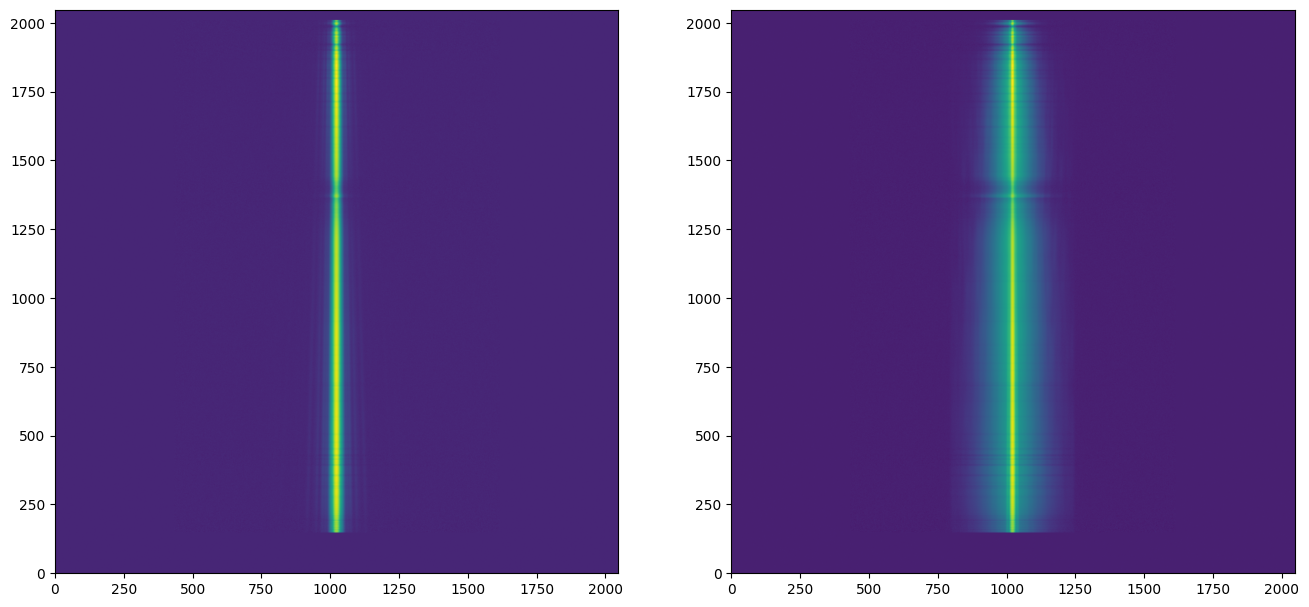

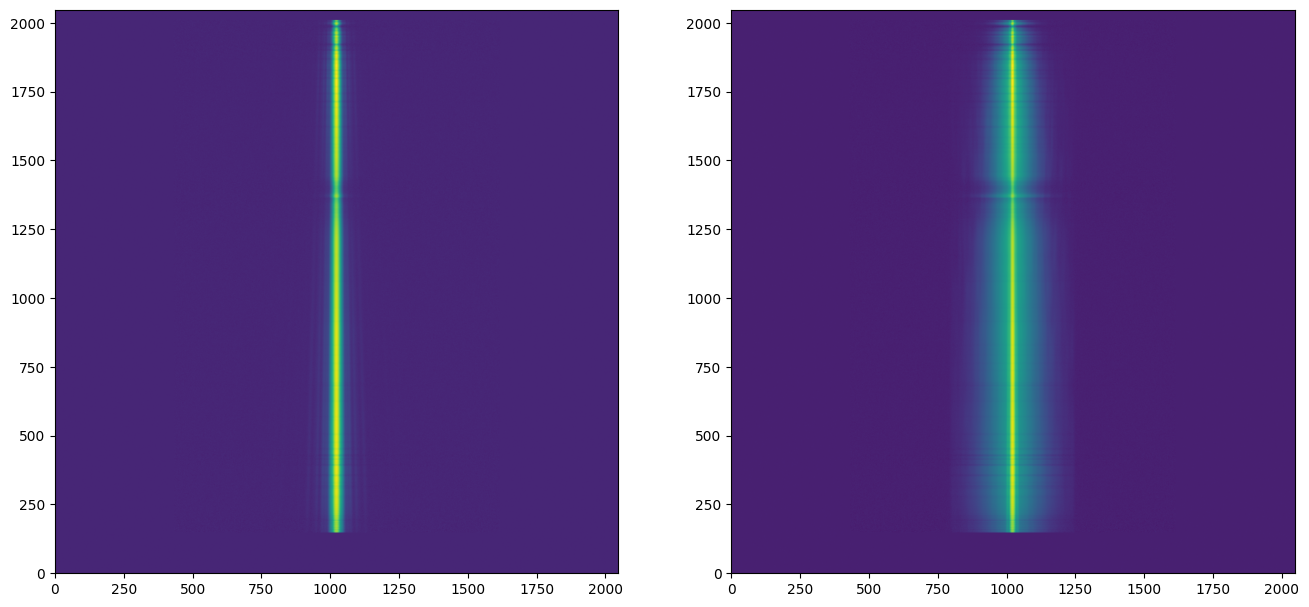

In [11]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.imshow(hdul_01[1].data - hdul_sky[1].data + 1, origin='lower', norm="log")
plt.subplot(122)
plt.imshow(hdul_02[1].data - hdul_sky[1].data + 1, origin='lower', norm="log")
plt.show()

Save the simulation results in FITS files for analysis with external tools.

In [10]:
hdul_01.writeto("AGN_prepared-scopesim_lss_n.fits", overwrite=True)
hdul_02.writeto("AGN_rotated_50-scopesim_lss_n.fits", overwrite=True)
hdul_sky.writeto("AGN_background-scopesim_lss_n.fits", overwrite=True)